# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

*We would need to dummify the following variables:*
- species
- island
- sex

In [30]:
#Importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from pandas import *
from sklearn.preprocessing import OneHotEncoder


#Importing Palmer Penguins
penguins = sns.load_dataset("penguins")

penguins.dropna(inplace=True)

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


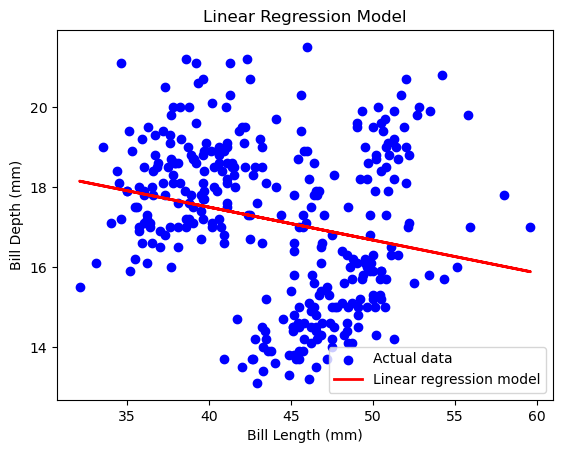

In [35]:
# Extracting the necessary columns for the regression
X = penguins[['bill_length_mm']] 
y = penguins['bill_depth_mm'] 

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict the values
y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear regression model')
plt.title('Linear Regression Model')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.legend()
plt.show()

C:\Users\ryanc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\ryanc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\ryanc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\ryanc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


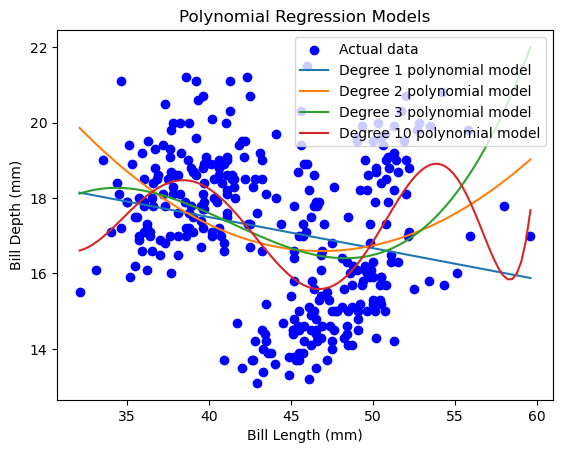

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Extract the necessary columns for the regression
X = penguins[['bill_length_mm']]  # Predictor variable
y = penguins['bill_depth_mm']  # Target variable

# Plot the data
plt.scatter(X, y, color='blue', label='Actual data')

# Fit different polynomial models and plot the regression lines
for degree in [1, 2, 3, 10]:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_poly = poly_features.transform(X_range)
    y_range_pred = model.predict(X_range_poly)

    plt.plot(X_range, y_range_pred, label=f'Degree {degree} polynomial model')

plt.title('Polynomial Regression Models')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.legend()
plt.show()


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
I would say the models of degree 1, 2, and 3 were all underfitting the data. None of them were able to capture the relationship between x and y very well, seeing as how none of them showed some of the behaviors that I noticed from the actual data.
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
The model of degree 10 was certainly over fitting, and is trying to capture too much of the data.
* Which of the above models do you think fits the data best and why?
Based on the four that are available, I feel as though a degree 2 model may have been the best. I may not have constructed the correct model, in which case a concave down parabola may have captured it best.